<a href="https://colab.research.google.com/github/BarruHarish/Colour-Detection-/blob/main/Colour_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sasuke-uchiha-dark-3840x2160-19881.jpg to sasuke-uchiha-dark-3840x2160-19881.jpg


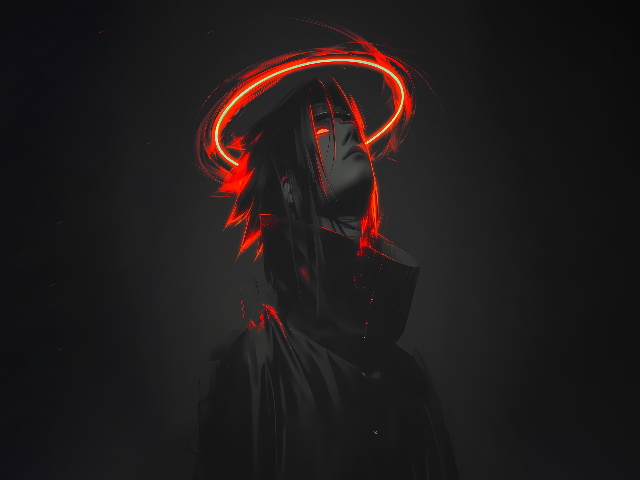

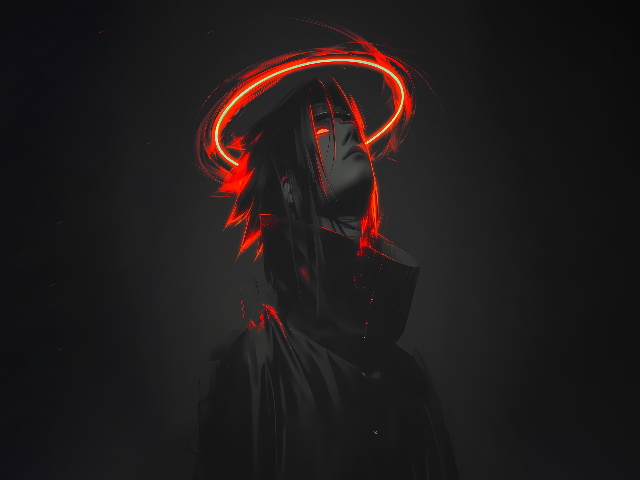

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



📍 Pixel: (300, 350)
🎨 RGB: (41, 41, 41)
🟢 Predicted Color: black


In [ ]:
# ✅ STEP 1: Install required libraries
!pip install opencv-python-headless pandas scikit-learn matplotlib

# ✅ STEP 2: Import Libraries
import cv2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# ✅ STEP 3: Color dataset (manual & reliable)
colors = {
    "name": ["black", "white", "red", "green", "blue", "yellow", "cyan", "magenta", "gray", "orange", "pink", "purple", "brown"],
    "red": [0, 255, 255, 0, 0, 255, 0, 255, 128, 255, 255, 128, 139],
    "green": [0, 255, 0, 255, 0, 255, 255, 0, 128, 165, 192, 0, 69],
    "blue": [0, 255, 0, 0, 255, 0, 255, 255, 128, 0, 203, 128, 19]
}
df = pd.DataFrame(colors)

# ✅ STEP 4: Train ML model (KNN)
X = df[['red', 'green', 'blue']]
y = df['name']
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# ✅ STEP 5: Upload Image
uploaded = files.upload()
image_path = next(iter(uploaded))
img = cv2.imread(image_path)
img = cv2.resize(img, (640, 480))
cv2_imshow(img)


# Show the image
cv2_imshow(img)

# Ask for pixel coordinates
while True:
    try:
        x = int(input("\n🖱 Enter X coordinate (or -1 to stop): "))
        if x == -1:
            break
        y = int(input("🖱 Enter Y coordinate: "))

        # Get RGB value from image
        b, g, r = img[y, x]
        predicted_color = model.predict([[r, g, b]])[0]

        print(f"\n📍 Pixel: ({x}, {y})")
        print(f"🎨 RGB: ({r}, {g}, {b})")
        print(f"🟢 Predicted Color: {predicted_color}")
    except Exception as e:
        print("⚠️ Invalid input or out of range. Try again.")


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.gcf().canvas.mpl_connect('button_press_event', on_click)
plt.axis('off')
plt.title("detect color")
plt.show()
